# Practica 3 (Regresión logística multiclase y redes neuronales)
### Aprendizaje automático y big data
##### _Alberto García Doménech - Pablo Daurell Marina_    
---

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
# cargamos los datos, en este caso 5000 ejemplos de entrenamiento(imagenes 20x20 pixeles)
from scipy.io import loadmat
data = loadmat ('ex3data1.mat')

# se pueden consultar las claves con data.keys()
y = data['y']
X = data['X']

np.shape(X) # (5000, 400)
np.shape(y) # (5000,1)

y = y.T[0]
np.place(y, y == 10, 0) # Como el valor 10 representa el dígito 0 lo cambiamos por un 0
np.shape(y) # (5000,)

num_examples = np.shape(X)[0] # 5000 ejemplos
num_features = np.shape(X)[1] # 400 atributos (por cada ejemplo)
num_etiquetas = 10 # Del 0 al 9

# añadimos una columna de 1's a la X
X = np.hstack([np.ones([num_examples, 1]), X])
y

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

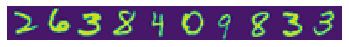

In [156]:
# seleccionamos 10 numeros al azar y los mostramos
sample = np.random.choice(X.shape[0], 10)
plt.imshow(X[sample, 1:].reshape(-1,20).T)
plt.axis('off')
plt.show()

In [157]:
# utilizamos de nuevo las funciones de coste,sigmoide y de gradiente
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def cost(Theta, X, Y, Lambda):
    H = sigmoid(np.matmul(X, Theta))
    aux = (-1 / len(X)) * ( np.matmul(np.log(H).T, Y) + np.matmul(np.log(1-H).T, (1-Y)))
    regul = (Lambda/(2*len(X))) * np.sum(Theta**2)
    return (aux + regul)

def gradient(Theta, X, Y, Lambda):
    H = sigmoid(np.matmul(X, Theta))
    aux = np.matmul(X.T, H - Y) / len(X)
    regul = (Lambda/len(X)) * Theta
    return (aux + regul)

In [158]:
import scipy.optimize as opt
def oneVsAll(X, y, num_etiquetas, reg):
    """
    oneVsAll entrena varios clasificadores por regresión logística con término
    de regularización 'reg' y devuelve el resultado en una matriz, donde la 
    fila i-ésima corresponde al clasificador de la etiqueta i-ésima
    """
    # Creamos una matriz de 'num_etiquetas' clasificadores con 'num_features + 1' atributos cada uno
    classifiers = np.zeros(shape=(num_etiquetas, num_features + 1))
    
    # entrenamos un clasificador por cada una de las clases del conjunto de datos
    for i in range(num_etiquetas):
        # Necesitamos un valor de theta por cada atributo
        theta = np.zeros(num_features + 1)
        
        # Dividimos nuestras clases en dos conjuntos, la clase que queremos predecir (y == i) y el resto (y != i)
        label = (y == i) * 1
        
        # Entrenamos al clasificador
        result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, label, reg))
        classifiers[i, :] = result[0]
        
    return classifiers

In [159]:
regul_param = 0.1
classifiers = oneVsAll(X, y, num_etiquetas, regul_param)

In [160]:
# Almacenamos en una matriz de 5000x9 las probabilidades de que cada ejemplo pertenezca a una clase
probabilities = sigmoid(np.matmul(X, classifiers.T))
# Nos quedamos con el indice (la clase) que tenga la probabilidad más alta
predictions = np.argmax(probabilities, axis=1)

In [161]:
fallos =  np.where([predictions != y])[1]
print('Numero de fallos:', len(fallos))

aciertos = np.where([predictions == y])[1]
print('Numero de aciertos:', len(aciertos))

Numero de fallos: 175
Numero de aciertos: 4825


In [162]:
accuracy = 100 * np.mean(predictions == y)
print("Porcentaje de aciertos: ", accuracy)

Porcentaje de aciertos:  96.5


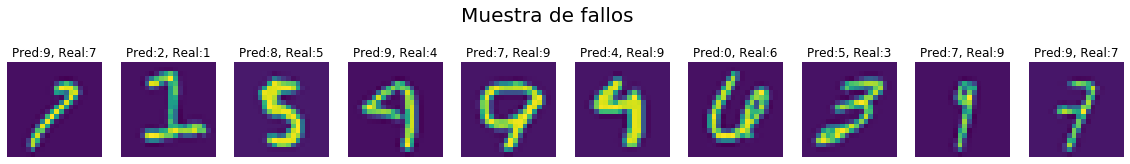

In [163]:
sample = fallos[np.random.choice(fallos.shape[0], 10)]

fig, axs = plt.subplots(1, 10, figsize=(20, 3), sharey=True)
fig.suptitle('Muestra de fallos', size=20)
i = 0
for fallo in sample:
    axs[i].imshow(X[fallo, 1:].reshape(-1,20).T)
    axs[i].axis('off')
    axs[i].set_title('Pred:{}, Real:{}'.format(predictions[fallo], y[fallo]))
    i = i + 1

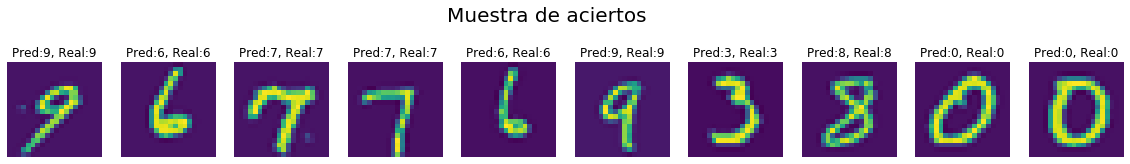

In [164]:
sample = aciertos[np.random.choice(aciertos.shape[0], 10)]

fig, axs = plt.subplots(1, 10, figsize=(20, 3), sharey=True)
fig.suptitle('Muestra de aciertos', size=20)
i = 0
for acierto in sample:
    axs[i].imshow(X[acierto, 1:].reshape(-1,20).T)
    axs[i].axis('off')
    axs[i].set_title('Pred:{}, Real:{}'.format(predictions[acierto], y[acierto]))
    i = i + 1